In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
import joblib  # For saving and loading the model

In [17]:
df = pd.read_csv('../data/amazon_reviews_reviewText_ratings.csv')
# df = df.sample(frac=0.1, random_state=42)

In [18]:
# Assuming df is your DataFrame
X = df['reviewText']
y = df['rating']

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercasing
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Apply text cleaning
X_cleaned = X.apply(clean_text)

# Continue with the train-test split and TF-IDF vectorization
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

In [20]:
# Preprocessing the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [21]:
# Creating a pipeline with TF-IDF Vectorizer and Random Forest Classifier
pipeline = make_pipeline(vectorizer, RandomForestClassifier(n_estimators=100, random_state=42))

# Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [22]:
# Making predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7287402448123576

Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.45      0.51      6257
           2       0.48      0.09      0.15      4375
           3       0.49      0.16      0.25      7494
           4       0.55      0.12      0.20     13368
           5       0.75      0.98      0.85     67684

    accuracy                           0.73     99178
   macro avg       0.57      0.36      0.39     99178
weighted avg       0.68      0.73      0.66     99178



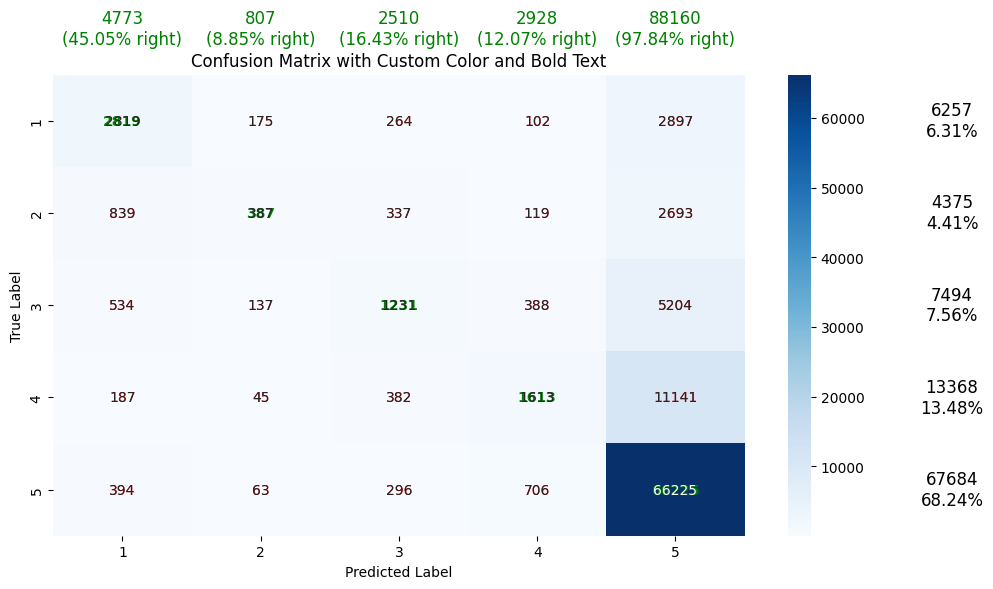

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def conf_matrix(y_predicted, y_test):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_predicted)
    classes = np.unique(y_test)

    # Correctly count occurrences using NumPy
    predicted_counts = [np.sum(y_predicted == i) for i in classes]
    accuracy_per_class = [100 * cm[i, i] / sum(cm[i]) for i in range(len(cm))]
    support = [np.sum(y_test == i) for i in classes]

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting the confusion matrix with custom annotations
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            color = 'green' if i == j else 'red'
            fontweight = 'bold' if i == j else 'normal'
            ax.text(j + 0.5, i + 0.5, cm[i, j],
                    ha="center", va="center", color=color, fontweight=fontweight)

    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)

    ax.set_title("Confusion Matrix with Custom Color and Bold Text")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

    # Set the labels on x-axis and y-axis to start from 1
    ax.set_xticklabels([str(i) for i in range(1, len(classes) + 1)])
    ax.set_yticklabels([str(i) for i in range(1, len(classes) + 1)])

    for i, (count, accuracy) in enumerate(zip(predicted_counts, accuracy_per_class)):
        ax.text(i + 0.5, -0.5, f"{count}\n({accuracy:.2f}% right)", va='center', ha='center', fontsize=12, color='green')

    for i, count in enumerate(support):
        ax.text(len(cm)+1.5, i + 0.5, f"{count}\n{count/len(y_pred)*100:.2f}%", va='center', ha='center', fontsize=12)

    plt.tight_layout()
    plt.show()
    
conf_matrix(y_pred, y_test)

In [23]:
# Saving the model to a file
model_filename = '../models/random_forest_review_model.joblib'
joblib.dump(pipeline, model_filename)
print(f"Model saved to {model_filename}")

Model saved to ../models/random_forest_review_model.joblib


In [29]:
# Loading the model
loaded_model = joblib.load(model_filename)

# Example reviews
new_reviews = ["Not what I expected, could be better.", "This product was amazing, helped me a lot!"]
new_reviews = ["below average.", "This product was amazing, helped me a lot!"]

new_reviews_cleaned = [clean_text(review) for review in new_reviews]

# Making predictions on new reviews
predictions = loaded_model.predict(new_reviews_cleaned)
print(predictions)

[3 5]
